In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [39]:

#функция, реализующая алгоритм дейкстры
def Dijkstra_algorithm(graph, start):

    n = len(graph)  # найдем количество вершин в графе
    visited = [False] * n  # заведем массив для отслеживания посещенных вершин
    distances = [float('inf')] * n #заведем массив оценок кратчайших расстояний до начальной верштны 
    distances[start] = 0  # примем расстояние от начальной вершины до самой себя равным 0

    for _ in range(n):
        min_distance = float('inf') 
        min_vertex = None
        
        for vertex in range(n): 
            #если текущей вершины нет в массиве посещенных и расстояние до нее меньше принятого за минимальное, 
            #то переопределяем min_distance и min_vertex
            if not visited[vertex] and distances[vertex] < min_distance:
                min_distance = distances[vertex]
                min_vertex = vertex

        if min_vertex is None:  #если все вершины посещены или несовершенные
            break

        visited[min_vertex] = True  #заносим вершину в массив посещенных

        #обновляем расстояния
        for neighbor in range(n):
            if graph[min_vertex][neighbor] > 0:  #проверяем наличие ребра
                distance = distances[min_vertex] + graph[min_vertex][neighbor]
                if distance < distances[neighbor]:
                    distances[neighbor] = distance

    return distances


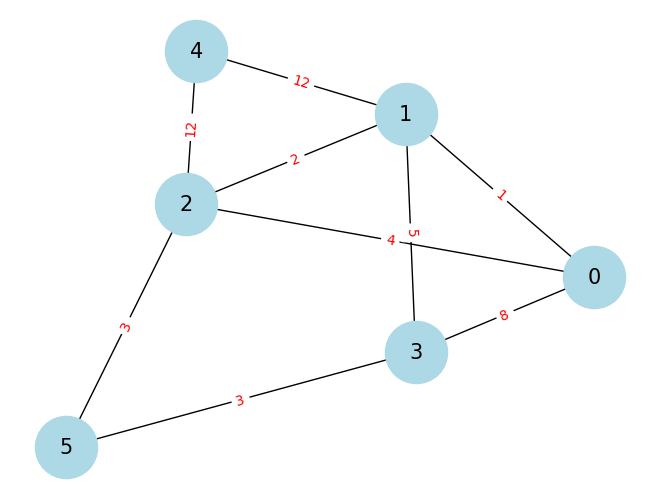

In [49]:
#графа, заданный в виде матрицы смежности
graph = np.array([
    [0, 1, 4, 8, 0, 0],
    [1, 0, 2, 5, 12, 0],
    [4, 2, 0, 0, 12, 3],
    [8, 5, 0, 0, 0, 3],
    [0, 12, 12, 0, 0, 0],
    [0, 0, 3, 3, 0, 0]
])

#визуализация этого графа
G = nx.from_numpy_array(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'weight')
for i, (start, end) in enumerate(G.edges()):
    edge_labels[(start, end)] = graph[start][end]
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [53]:
start = 3  #задаем начальную вершину
distances = Dijkstra_algorithm(graph, start)  

print("кратчайшие расстояния от вершины", start, ":")
for i in range(len(distances)):
    print(f"До вершины {i}: {distances[i]}")

кратчайшие расстояния от вершины 3 :
До вершины 0: 6
До вершины 1: 5
До вершины 2: 6
До вершины 3: 0
До вершины 4: 17
До вершины 5: 3
